# Исследование данных. ДЗ №3

# Часть 1. Файловая

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\user\\Vika HR-analytics'

In [4]:
df_hr = pd.read_csv('HRDataset_v14.csv')

In [5]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot

In [6]:
pd.options.display.max_columns = 999

In [7]:
df_hr.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.000,LinkedIn,Fully Meets,4.070,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.000,Google Search,PIP,3.200,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.000,Employee Referral,Exceeds,4.600,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.000,Employee Referral,Fully Meets,5.000,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,0,19,Production Technician I,MA,1730,08/17/78,F,Widowed,US Citizen,No,Asian,9/29/2014,NaN,N/A-StillEmployed,Active,Production,David Stanley,14.000,LinkedIn,Fully Meets,4.500,5,0,1/30/2019,0,2


In [8]:
df_hr['State'].nunique()

28

In [9]:
# Какие скалированные признаки мы имели на лекции в итоге:
# MaritalStatusID, DeptID, PerfScoreID, SpecialProjectsCount, State_id - текст State в цифрах
# Улучшим скор

Разобьем нашу выборку на пространство признаков (X) и ответов (Y)

In [10]:
X = df_hr[['DeptID', 'PerfScoreID', 'PositionID', 'SpecialProjectsCount', 'DaysLateLast30']]

y = df_hr[['Salary']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(248, 5)
(63, 5)
(248, 1)
(63, 1)


# Часть 2. Моделируем

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
# Определим функцию оценки ошибки получившейся модели:

def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

# Часть 3. Модель

# Матрица корреляций

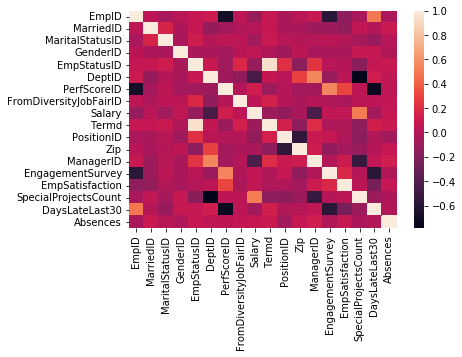

In [15]:
import seaborn as sns
corr = df_hr.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

In [16]:
df_hr.corr()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000,0.048,-0.044,0.036,0.074,0.107,-0.691,0.047,-0.115,0.092,-0.036,0.027,0.090,-0.590,-0.147,-0.044,0.496,-0.025
MarriedID,0.048,1.000,0.164,-0.024,0.086,-0.120,-0.058,-0.013,0.026,0.077,-0.027,-0.041,-0.094,-0.091,-0.126,0.061,0.003,0.096
MaritalStatusID,-0.044,0.164,1.000,-0.030,0.115,0.013,0.045,0.041,-0.070,0.099,0.022,0.011,0.023,0.033,0.002,-0.051,-0.096,0.019
GenderID,0.036,-0.024,-0.030,1.000,-0.032,-0.039,-0.055,0.031,0.056,-0.016,-0.082,0.049,-0.043,-0.036,-0.045,0.087,0.080,-0.005
EmpStatusID,0.074,0.086,0.115,-0.032,1.000,0.089,-0.071,0.189,-0.111,0.948,0.221,-0.151,0.234,0.024,0.011,-0.167,0.078,0.092
DeptID,0.107,-0.120,0.013,-0.039,0.089,1.000,-0.085,-0.130,-0.448,0.066,0.030,0.290,0.550,-0.095,0.032,-0.785,0.125,0.053
PerfScoreID,-0.691,-0.058,0.045,-0.055,-0.071,-0.085,1.000,0.012,0.131,-0.089,0.005,-0.058,-0.061,0.545,0.304,0.046,-0.735,0.047
FromDiversityJobFairID,0.047,-0.013,0.041,0.031,0.189,-0.130,0.012,1.000,0.041,0.148,0.015,-0.028,0.008,-0.013,-0.034,0.031,0.043,0.063
Salary,-0.115,0.026,-0.070,0.056,-0.111,-0.448,0.131,0.041,1.000,-0.094,-0.131,-0.037,-0.435,0.065,0.063,0.508,-0.069,0.082
Termd,0.092,0.077,0.099,-0.016,0.948,0.066,-0.089,0.148,-0.094,1.000,0.147,-0.139,0.209,-0.018,-0.005,-0.147,0.136,0.098


In [17]:
df_hr.groupby('ManagerID')['Salary'].mean()

ManagerID
1.000     57893.833
2.000     94814.842
3.000    106367.000
4.000     99331.412
5.000    136061.143
6.000     63188.750
7.000     73578.500
9.000    174675.500
10.000    98203.222
11.000    57881.857
12.000    60095.455
13.000    98319.750
14.000    56938.571
15.000    69240.000
16.000    60635.955
17.000    65350.429
18.000    58912.182
19.000    56936.667
20.000    57183.818
21.000    64482.538
22.000    58099.143
30.000    63478.000
39.000    56549.615
Name: Salary, dtype: float64

# Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# creat1ing initial dataframe
temp_df = pd.DataFrame(df_hr[['MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'RecruitmentSource']])

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_hr['MaritalDesc_id'] = labelencoder.fit_transform(temp_df['MaritalDesc'])
df_hr['CitizenDesc_id'] = labelencoder.fit_transform(temp_df['CitizenDesc'])
df_hr['HispanicLatino_id'] = labelencoder.fit_transform(temp_df['HispanicLatino'])
df_hr['RaceDesc_id'] = labelencoder.fit_transform(temp_df['RaceDesc'])
df_hr['RecruitmentSource_id'] = labelencoder.fit_transform(temp_df['RecruitmentSource'])
df_hr['is_5'] = labelencoder.fit_transform(df_hr['ManagerID'] == 5)
df_hr['is_3'] = labelencoder.fit_transform(df_hr['ManagerID'] == 3)
df_hr['is_9'] = labelencoder.fit_transform(df_hr['ManagerID'] == 9)

df_hr.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,MaritalDesc_id,CitizenDesc_id,HispanicLatino_id,RaceDesc_id,RecruitmentSource_id,is_5,is_3,is_9
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.000,LinkedIn,Exceeds,4.600,5,0,1/17/2019,0,1,3,2,0,5,5,0,0,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.000,Indeed,Fully Meets,4.960,3,6,2/24/2016,0,17,1,2,0,5,4,0,0,0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.000,LinkedIn,Fully Meets,3.020,3,0,5/15/2012,0,3,1,2,0,5,5,0,0,0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.000,Indeed,Fully Meets,4.840,5,0,1/3/2019,0,15,1,2,0,5,4,0,0,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.000,Google Search,Fully Meets,5.000,4,0,2/1/2016,0,2,0,2,0,5,3,0,0,0
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.000,LinkedIn,Exceeds,5.000,5,0,1/7/2019,0,15,3,2,0,5,5,0,0,0
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.000,LinkedIn,Fully Meets,3.040,3,4,1/2/2019,0,19,3,2,0,5,5,0,0,0
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.000,Employee Referral,Fully Meets,5.000,4,0,2/25/2019,0,19,4,2,0,5,2,0,0,0
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.000,Diversity Job Fair,Fully Meets,4.460,3,0,1/25/2019,0,4,3,2,0,2,1,0,0,0
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.000,Indeed,Fully Meets,5.000,5,6,2/18/2019,0,16,0,2,0,5,4,0,0,0


# Скалирование и оценка

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [25]:
df = df_hr[['DeptID', 'PerfScoreID',  'PositionID', 'SpecialProjectsCount', 'DaysLateLast30', 'Salary',
           'MaritalDesc_id', 'EmpSatisfaction', 'is_5']]

df = df.dropna()

X = df.drop('Salary', axis=1)
y = df['Salary']

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

model_access(lin_model, X_train, X_test, Y_train, Y_test)

[-18101.73155419  13107.41616015  -6206.74077501  21242.97894004
   6278.92257772    418.17312496   2420.16436021  52912.06222073]


The model performance for training set
--------------------------------------
RMSE is 20175.913643484422
R2 score is 0.301679588037681
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 20634.884867549674
R2 score is 0.4739499245089468


# Часть 4. Выводы

Что помогло? - скалирование, матрица корреляций, Label Encoding, анализ аномалий
1. Сначала я смотрела на все признаки, убирала какие мне не понравились, смотрела графики с помощью matplotlib (см. пример с absences).
2. Далее я посмотрела статью и узнала о матрице корреляции - сделала её.
3. Заметила два очень "сильных" признака - managerID и DeptID. С managerID у меня были жуткие проблемы, в плане того, что там были NaN значения, пришлось подумать.
4. Что я сделала: сгруппировала managerID и нашла аномалии. Решила в признаки добавить одного из менеджеров.
5. Также я применяла Label Encoding чтобы текст превратить в цифры и поиграться с признаками.
6. Всё скалировала

# Заметки

Absences

In [23]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Amount of employees')

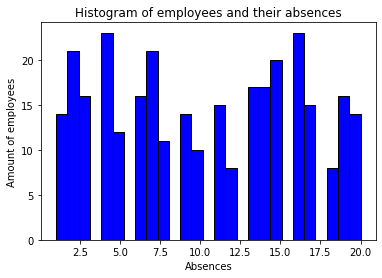

In [24]:
# matplotlib histogram
plt.hist(df_hr['Absences'], color = 'blue', edgecolor = 'black',
         bins = int(27))

# Add labels
plt.title('Histogram of employees and their absences')
plt.xlabel('Absences')
plt.ylabel('Amount of employees')

In [24]:
# importance of Absences = 8808.83344937, но на гистограмме видно,что:
# в целом отсутвия распределены равномерно, потому данный признак не является релевантным.